In [2]:
"""
    Import all the required libraries to convert the annotation files within the AU-AIR dataset
    from JSON format to a TXT YOLOv5 friendly dataset.
    
"""

import pandas as pd
import os, random
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import PyQt5
import shutil

In [3]:
df = pd.read_json(os.path.join("Documents", "GitHub", "Drone_Training", "Data", "Au-Air", "annotations.json"), lines=True)

In [5]:
ids = ['human', 'car', 'truck', 'van', 'motorcycle', 'bicycle', 'bus', 'trailer']

In [7]:
"""
    Converts annotations from JSON to YOLOv5 TXTs

    This function converts one JSON file containing all annotations to seperate
    TXT files for every image according to what is required for the YOLOv5 model.
    
    The function executes for every seperate row that exist in the JSON file. The 
    image_name gets read, as well as the bounding box coordinates and class.
    After reading those values, a new text file is created to store those values. 
    The name gets taken from the image name.
    
    Parameters
    ----------
    ind : int
        Row number from dataframe where the JSON annotations are stored in.

"""


def GenerateXML(ind):
    
    fileName = df['image_name'][ind]
    TxtName = ""
    
    lines = []
    
    for id in range(len(df['bbox'][ind])):
        
        category = df['bbox'][ind].copy().pop(id).get('class')
        
        if category == 0:
            TxtName = os.path.join("data", "labels", "humans", fileName[:-4] + ".txt")
            
            x_center = "{:.6f}".format(round((df['bbox'][ind].copy().pop(id).get('left')+ (df['bbox'][ind].copy().pop(id).get('width')/2))/1920, 6))
            y_center = "{:.6f}".format(round((df['bbox'][ind].copy().pop(id).get('top') + (df['bbox'][ind].copy().pop(id).get('height')/2))/1080, 6))
            width = "{:.6f}".format(round((df['bbox'][ind].copy().pop(id).get('width')/1920), 6))
            height = "{:.6f}".format(round((df['bbox'][ind].copy().pop(id).get('height')/1080), 6))

            lines.append(f'{category} {x_center} {y_center} {width} {height}')
            
        else:
            if TxtName == "":
                TxtName = os.path.join("data", "labels", "rest", fileName[:-4] + ".txt")
    
    with open(TxtName, 'w') as f:
        if lines:
            for line in lines:
                f.write("%s\n" % line)
    shutil.copy(os.path.join("data", "images", fileName[:-4] + ".jpg"), TxtName.replace('labels', 'images')[:-4]+".jpg)

In [8]:
for ind in df.index:
    GenerateXML(ind)

In [41]:
dir_name = "data/images"
test = os.listdir(dir_name)

for item in test:
    if item.endswith(".jpg"):
        os.remove(os.path.join(dir_name, item))

C:\Users\rdede\Documents\GitHub\YoloV5\data\labels\frame_20190905143505_x_0002129.txt
C:\Users\rdede\Documents\GitHub\YoloV5\data\images\frame_20190905143505_x_0002129.jpg


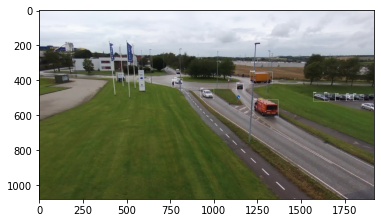

In [6]:
random.seed(0)

#class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), ids[(int(obj_cls))])
    
    plt.imshow(np.array(image))
    plt.show()

# Get any random annotation file 
annotation_file = "C:\\Users\\rdede\\Documents\\GitHub\\YoloV5\\data\\labels\\" + random.choice(os.listdir("C:\\Users\\rdede\\Documents\\GitHub\\YoloV5\\data\\labels"))
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
print(annotation_file)
image_file = annotation_file.replace("labels", "images").replace("txt", "jpg")
print(image_file)
assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
%matplotlib inline
plot_bounding_box(image, annotation_list)